In [85]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import numpy as np

from utils import *

import networkx as nx

import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

In [87]:
PER_UNIT_GDP = 'Per unit GDP'
ROAD_DENSITY = 'Road density'
POPULATION_DENSITY = 'Population density'
ELEVATION = 'Elevation'
SLOPE = 'Slope'
RAINFALL_FREQUENCY = 'Rainfall frequency'
RIVER_DENSITY = 'River density'
RAINFALL_AMOUNT = 'Rainfall amount'
FLOOD = 'Flood'

In [88]:
variables = [
    PER_UNIT_GDP,
    ROAD_DENSITY,
    POPULATION_DENSITY,
    ELEVATION,
    SLOPE,
    RAINFALL_FREQUENCY,
    RIVER_DENSITY,
    RAINFALL_AMOUNT,
    FLOOD
]

In [89]:
values_dictionary = {
    PER_UNIT_GDP: [
        [0.3], 
        [0.63], 
        [0.07]
    ],
    POPULATION_DENSITY: [
        [0.7, 0.3, 0.05],
        [0.2, 0.55, 0.25],
        [0.1, 0.15, 0.7],
    ],
    ROAD_DENSITY: [
        [0.8, 0.7, 0.1, 0.6, 0.4, 0.1, 0.1, 0.05, 0.01],
        [0.19, 0.25, 0.35, 0.3, 0.5, 0.25, 0.25, 0.2, 0.15],
        [0.01, 0.05, 0.55, 0.1, 0.1, 0.65, 0.65, 0.75, 0.84]
    ],
    ELEVATION: [
        [0.15],
        [0.1], 
        [0.75]
    ],
    SLOPE: [
        [0.75, 0.6, 0.05], 
        [0.25, 0.4, 0.95]
    ],
    RAINFALL_FREQUENCY: [
        [0.3], 
        [0.6], 
        [0.1]
    ],
    RIVER_DENSITY: [
        [0.4], 
        [0.6]
    ],
    RAINFALL_AMOUNT: [
        [0.7, 0.5, 0.55, 0.3, 0.1, 0.01],
        [0.2, 0.25, 0.3, 0.4, 0.3, 0.04],
        [0.1, 0.25, 0.15, 0.3, 0.6, 0.95]
    ],
    FLOOD: [
        [0.07, 0.03, 0.005, 0.2, 0.1, 0.008, 0.05, 0.009, 0.0005, 0.13, 0.08, 0.006, 0.008, 0.002, 0.0001, 0.1, 0.04, 0.0002],
        [0.93, 0.97, 0.995, 0.8, 0.9, 0.992, 0.95, 0.991, 0.9995, 0.87, 0.92, 0.994, 0.992, 0.998, 0.9999, 0.9, 0.96, 0.9998]
    ],
}

# FLOOD, ROAD_DENSITY, SLOPE, RAINFALL_AMOUNT

In [90]:
cpd_to_pandas(cpd_rainfall_amount)

Rainfall frequency(Frequent)   \
                           River density(Dense)            
 Rainfall amount(Huge)                               0.7   
 Rainfall amount(Medium)                             0.2   
 Rainfall amount(Little)                             0.1   

                                                          \
                           River density(Sparse)           
 Rainfall amount(Huge)                              0.50   
 Rainfall amount(Medium)                            0.25   
 Rainfall amount(Little)                            0.25   

                           Rainfall frequency(Medium)   \
                           River density(Dense)          
 Rainfall amount(Huge)                            0.55   
 Rainfall amount(Medium)                          0.30   
 Rainfall amount(Little)                          0.15   

                                                        \
                           River density(Sparse)         
 Rainfall amount(Huge)                             0.3   
 Rainfall amount(Medium)                           0.4   
 Rainfall amount(Little)                           0.3   

                           Rainfall frequency(Rare)   \
                           River density(Dense)        
 Rainfall amount(Huge)                           0.1   
 Rainfall amount(Medium)                         0.3   
 Rainfall amount(Little)                         0.6   

                                                      
                           River density(Sparse)      
 Rainfall amount(Huge)                          0.01  
 Rainfall amount(Medium)                        0.04  
 Rainfall amount(Little)                        0.95

In [91]:
state_names_dictionary = {
    PER_UNIT_GDP: ['High', 'Medium', 'Low'],
    POPULATION_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ROAD_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ELEVATION: ['High', 'Medium', 'Low'],
    SLOPE: ['Steep', 'Flat'],
    RAINFALL_FREQUENCY: ['Frequent', 'Medium', 'Rare'],
    RIVER_DENSITY: ['Dense', 'Sparse'],
    RAINFALL_AMOUNT: ['Huge', 'Medium', 'Little'],
    FLOOD: ['Yes', 'No']
}

In [92]:
edges = [
    (PER_UNIT_GDP, ROAD_DENSITY), 
    (PER_UNIT_GDP, POPULATION_DENSITY), 
    (POPULATION_DENSITY, ROAD_DENSITY),
    (ROAD_DENSITY, FLOOD),
    (ELEVATION, SLOPE),
    (SLOPE, FLOOD),
    (RAINFALL_FREQUENCY, RAINFALL_AMOUNT),
    (RIVER_DENSITY, RAINFALL_AMOUNT),
    (RAINFALL_AMOUNT, FLOOD)
]

In [93]:
evidence_dictionary = {
    PER_UNIT_GDP: None,
    POPULATION_DENSITY: [PER_UNIT_GDP],
    ROAD_DENSITY: [PER_UNIT_GDP, POPULATION_DENSITY],
    ELEVATION: None,
    SLOPE: [ELEVATION],
    RAINFALL_FREQUENCY: None,
    RIVER_DENSITY: None,
    RAINFALL_AMOUNT: [RAINFALL_FREQUENCY, RIVER_DENSITY],
    FLOOD: [ROAD_DENSITY, SLOPE, RAINFALL_AMOUNT]
}

In [94]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel(edges)

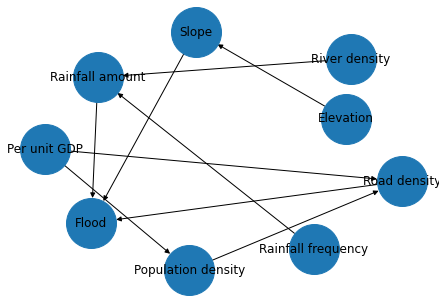

In [95]:
nx.draw(model, node_size = 2500, with_labels = True)
plt.show()

In [96]:
# ToDo: an idea can be to set the evidence, its cardinality and the state_names programmatically, 
# or even define these tables in a for loop

cpd_per_unit_gdp = TabularCPD(
    variable = PER_UNIT_GDP, 
    variable_card = len(state_names_dictionary[PER_UNIT_GDP]), 
    values = values_dictionary[PER_UNIT_GDP],
    state_names = get_state_names(PER_UNIT_GDP, state_names_dictionary, evidence_dictionary)
)

cpd_population_density = TabularCPD(
    variable = POPULATION_DENSITY, 
    variable_card = len(state_names_dictionary[POPULATION_DENSITY]), 
    values = values_dictionary[POPULATION_DENSITY],
    evidence = evidence_dictionary[POPULATION_DENSITY],
    evidence_card = get_evidence_card(POPULATION_DENSITY, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(POPULATION_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_road_density = TabularCPD(
    variable = ROAD_DENSITY, 
    variable_card = len(state_names_dictionary[ROAD_DENSITY]), 
    values = values_dictionary[ROAD_DENSITY],
    evidence = evidence_dictionary[ROAD_DENSITY],
    evidence_card = get_evidence_card(ROAD_DENSITY, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(ROAD_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_elevation = TabularCPD(
    variable = ELEVATION, 
    variable_card = len(state_names_dictionary[ELEVATION]), 
    values = values_dictionary[ELEVATION],
    state_names = get_state_names(ELEVATION, state_names_dictionary, evidence_dictionary)
)

cpd_slope = TabularCPD(
    variable = SLOPE, 
    variable_card = len(state_names_dictionary[SLOPE]), 
    values = values_dictionary[SLOPE],
    evidence = evidence_dictionary[SLOPE],
    evidence_card = get_evidence_card(SLOPE, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(SLOPE, state_names_dictionary, evidence_dictionary)
)

cpd_rainfall_frequency = TabularCPD(
    variable = RAINFALL_FREQUENCY, 
    variable_card = len(state_names_dictionary[RAINFALL_FREQUENCY]), 
    values = values_dictionary[RAINFALL_FREQUENCY],
    state_names = get_state_names(RAINFALL_FREQUENCY, state_names_dictionary, evidence_dictionary)
)

cpd_river_density = TabularCPD(
    variable = RIVER_DENSITY, 
    variable_card = len(state_names_dictionary[RIVER_DENSITY]), 
    values = values_dictionary[RIVER_DENSITY],
    state_names = get_state_names(RIVER_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_rainfall_amount = TabularCPD(
    variable = RAINFALL_AMOUNT, 
    variable_card = len(state_names_dictionary[RAINFALL_AMOUNT]), 
    values = values_dictionary[RAINFALL_AMOUNT],
    evidence = evidence_dictionary[RAINFALL_AMOUNT],
    evidence_card = get_evidence_card(RAINFALL_AMOUNT, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(RAINFALL_AMOUNT, state_names_dictionary, evidence_dictionary)
)

cpd_flood = TabularCPD(
    variable = FLOOD, 
    variable_card = len(state_names_dictionary[FLOOD]), 
    values = values_dictionary[FLOOD],
    evidence = evidence_dictionary[FLOOD],
    evidence_card = get_evidence_card(FLOOD, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(FLOOD, state_names_dictionary, evidence_dictionary)
)

In [97]:
model.add_cpds(cpd_per_unit_gdp, cpd_population_density, cpd_road_density, cpd_elevation, cpd_slope, cpd_rainfall_frequency, cpd_river_density, cpd_rainfall_amount, cpd_flood)
model.check_model()

True

In [98]:
cpd_to_pandas(cpd_per_unit_gdp)

,
Per unit GDP(High),0.30
Per unit GDP(Medium),0.63
Per unit GDP(Low),0.07


In [99]:
cpd_to_pandas(cpd_population_density)

,Per unit GDP(High),Per unit GDP(Medium),Per unit GDP(Low)
Population density(Dense),0.7,0.30,0.05
Population density(Medium),0.2,0.55,0.25
Population density(Sparse),0.1,0.15,0.70


In [100]:
cpd_to_pandas(cpd_road_density)

Per unit GDP(High)          \
                        Population density(Dense)    
 Road density(Dense)                          0.80   
 Road density(Medium)                         0.19   
 Road density(Sparse)                         0.01   

                        Per unit GDP(High)           \
                        Population density(Medium)    
 Road density(Dense)                           0.70   
 Road density(Medium)                          0.25   
 Road density(Sparse)                          0.05   

                                                     \
                        Population density(Sparse)    
 Road density(Dense)                           0.10   
 Road density(Medium)                          0.35   
 Road density(Sparse)                          0.55   

                        Per unit GDP(Medium)        \
                        Population density(Dense)    
 Road density(Dense)                           0.6   
 Road density(Medium)                          0.3   
 Road density(Sparse)                          0.1   

                        Per unit GDP(Medium)         \
                        Population density(Medium)    
 Road density(Dense)                            0.4   
 Road density(Medium)                           0.5   
 Road density(Sparse)                           0.1   

                                                     \
                        Population density(Sparse)    
 Road density(Dense)                           0.10   
 Road density(Medium)                          0.25   
 Road density(Sparse)                          0.65   

                        Per unit GDP(Low)           \
                        Population density(Dense)    
 Road density(Dense)                          0.10   
 Road density(Medium)                         0.25   
 Road density(Sparse)                         0.65   

                        Per unit GDP(Low)            \
                        Population density(Medium)    
 Road density(Dense)                           0.05   
 Road density(Medium)                          0.20   
 Road density(Sparse)                          0.75   

                                                     
                        Population density(Sparse)   
 Road density(Dense)                           0.01  
 Road density(Medium)                          0.15  
 Road density(Sparse)                          0.84

In [101]:
cpd_to_pandas(cpd_elevation)

,
Elevation(High),0.15
Elevation(Medium),0.10
Elevation(Low),0.75


In [102]:
cpd_to_pandas(cpd_slope)

,Elevation(High),Elevation(Medium),Elevation(Low)
Slope(Steep),0.75,0.6,0.05
Slope(Flat),0.25,0.4,0.95


In [103]:
cpd_to_pandas(cpd_rainfall_frequency)

,
Rainfall frequency(Frequent),0.3
Rainfall frequency(Medium),0.6
Rainfall frequency(Rare),0.1


In [104]:
cpd_to_pandas(cpd_river_density)

,
River density(Dense),0.4
River density(Sparse),0.6


In [105]:
cpd_to_pandas(cpd_rainfall_amount)

Rainfall frequency(Frequent)   \
                           River density(Dense)            
 Rainfall amount(Huge)                               0.7   
 Rainfall amount(Medium)                             0.2   
 Rainfall amount(Little)                             0.1   

                                                          \
                           River density(Sparse)           
 Rainfall amount(Huge)                              0.50   
 Rainfall amount(Medium)                            0.25   
 Rainfall amount(Little)                            0.25   

                           Rainfall frequency(Medium)   \
                           River density(Dense)          
 Rainfall amount(Huge)                            0.55   
 Rainfall amount(Medium)                          0.30   
 Rainfall amount(Little)                          0.15   

                                                        \
                           River density(Sparse)         
 Rainfall amount(Huge)                             0.3   
 Rainfall amount(Medium)                           0.4   
 Rainfall amount(Little)                           0.3   

                           Rainfall frequency(Rare)   \
                           River density(Dense)        
 Rainfall amount(Huge)                           0.1   
 Rainfall amount(Medium)                         0.3   
 Rainfall amount(Little)                         0.6   

                                                      
                           River density(Sparse)      
 Rainfall amount(Huge)                          0.01  
 Rainfall amount(Medium)                        0.04  
 Rainfall amount(Little)                        0.95

In [106]:
cpd_to_pandas(cpd_flood)

Road density(Dense)     Road density(Dense)       \
                   Slope(Steep)            Slope(Steep)               
                   Rainfall amount(Huge)   Rainfall amount(Medium)    
 Flood(Yes)                          0.07                      0.03   
 Flood(No)                           0.93                      0.97   

                                             Road density(Dense)     \
                                             Slope(Flat)              
                   Rainfall amount(Little)   Rainfall amount(Huge)    
 Flood(Yes)                           0.005                     0.2   
 Flood(No)                            0.995                     0.8   

                   Road density(Dense)                                 \
                   Slope(Flat)                                          
                   Rainfall amount(Medium)   Rainfall amount(Little)    
 Flood(Yes)                             0.1                     0.008   
 Flood(No)                              0.9                     0.992   

                   Road density(Medium)    Road density(Medium)      \
                   Slope(Steep)            Slope(Steep)               
                   Rainfall amount(Huge)   Rainfall amount(Medium)    
 Flood(Yes)                          0.05                     0.009   
 Flood(No)                           0.95                     0.991   

                                             Road density(Medium)    \
                                             Slope(Flat)              
                   Rainfall amount(Little)   Rainfall amount(Huge)    
 Flood(Yes)                          0.0005                    0.13   
 Flood(No)                           0.9995                    0.87   

                   Road density(Medium)                                \
                   Slope(Flat)                                          
                   Rainfall amount(Medium)   Rainfall amount(Little)    
 Flood(Yes)                            0.08                     0.006   
 Flood(No)                             0.92                     0.994   

                   Road density(Sparse)    Road density(Sparse)      \
                   Slope(Steep)            Slope(Steep)               
                   Rainfall amount(Huge)   Rainfall amount(Medium)    
 Flood(Yes)                         0.008                     0.002   
 Flood(No)                          0.992                     0.998   

                                             Road density(Sparse)    \
                                             Slope(Flat)              
                   Rainfall amount(Little)   Rainfall amount(Huge)    
 Flood(Yes)                          0.0001                     0.1   
 Flood(No)                           0.9999                     0.9   

                   Road density(Sparse)                                
                   Slope(Flat)                                         
                   Rainfall amount(Medium)   Rainfall amount(Little)   
 Flood(Yes)                            0.04                    0.0002  
 Flood(No)                             0.96                    0.9998

In [107]:
# Getting all the independencies given the parent nodes in the network.
print('Independecies given the parent nodes shown using the function local_independencies():')
model.local_independencies(variables)

Independecies given the parent nodes shown using the function local_independencies():


(Per unit GDP ⟂ Elevation, Rainfall frequency, River density, Slope, Rainfall amount)
(Road density ⟂ Elevation, Rainfall frequency, River density, Slope, Rainfall amount | Population density, Per unit GDP)
(Population density ⟂ Elevation, Rainfall frequency, River density, Slope, Rainfall amount | Per unit GDP)
(Elevation ⟂ Population density, Per unit GDP, Rainfall frequency, River density, Road density, Rainfall amount)
(Slope ⟂ Population density, Per unit GDP, Rainfall frequency, River density, Road density, Rainfall amount | Elevation)
(Rainfall frequency ⟂ Road density, Elevation, Population density, Per unit GDP, River density, Slope)
(River density ⟂ Road density, Elevation, Population density, Per unit GDP, Rainfall frequency, Slope)
(Rainfall amount ⟂ Slope, Elevation, Population density, Per unit GDP, Road density | Rainfall frequency, River density)
(Flood ⟂ Elevation, Population density, Per unit GDP, Rainfall frequency, River density | Slope, Road density, Rainfall amoun

In [108]:
for v in variables:
    print(model.active_trail_nodes(v))

{'Per unit GDP': {'Population density', 'Flood', 'Road density', 'Per unit GDP'}}
{'Road density': {'Population density', 'Flood', 'Road density', 'Per unit GDP'}}
{'Population density': {'Population density', 'Flood', 'Road density', 'Per unit GDP'}}
{'Elevation': {'Elevation', 'Flood', 'Slope'}}
{'Slope': {'Elevation', 'Flood', 'Slope'}}
{'Rainfall frequency': {'Rainfall frequency', 'Flood', 'Rainfall amount'}}
{'River density': {'River density', 'Flood', 'Rainfall amount'}}
{'Rainfall amount': {'Rainfall frequency', 'River density', 'Flood', 'Rainfall amount'}}
{'Flood': {'Population density', 'River density', 'Flood', 'Road density', 'Slope', 'Rainfall amount', 'Elevation', 'Per unit GDP', 'Rainfall frequency'}}


In [109]:
# v- structure activated from the evidence therefore river density 
# influences rainfall frequency because rainfall amount is in the evidence
model.active_trail_nodes(RIVER_DENSITY, observed=RAINFALL_AMOUNT)

{'River density': {'Rainfall frequency', 'River density'}}

In [110]:
print(model.active_trail_nodes(POPULATION_DENSITY, observed=[ROAD_DENSITY, PER_UNIT_GDP]))
print(model.active_trail_nodes(POPULATION_DENSITY, observed=[ROAD_DENSITY, PER_UNIT_GDP]))

{'Population density': {'Population density'}}
{'Population density': {'Population density'}}


In [111]:
model.get_markov_blanket(POPULATION_DENSITY)

['Road density', 'Per unit GDP']

In [112]:
for v in variables:
    markov_blanket = model.get_markov_blanket(v)
    print(model.active_trail_nodes(v, observed=markov_blanket))
    print('Given {}'.format(markov_blanket))
    print()

{'Per unit GDP': {'Per unit GDP'}}
Given ['Population density', 'Road density']

{'Road density': {'Road density'}}
Given ['Population density', 'Flood', 'Slope', 'Rainfall amount', 'Per unit GDP']

{'Population density': {'Population density'}}
Given ['Road density', 'Per unit GDP']

{'Elevation': {'Elevation'}}
Given ['Slope']

{'Slope': {'Slope'}}
Given ['Flood', 'Road density', 'Rainfall amount', 'Elevation']

{'Rainfall frequency': {'Rainfall frequency'}}
Given ['River density', 'Rainfall amount']

{'River density': {'River density'}}
Given ['Rainfall frequency', 'Rainfall amount']

{'Rainfall amount': {'Rainfall amount'}}
Given ['River density', 'Flood', 'Slope', 'Road density', 'Rainfall frequency']

{'Flood': {'Flood'}}
Given ['Slope', 'Road density', 'Rainfall amount']



### Exact inference

In [113]:
exact_infer = VariableElimination(model)

**P(Flood)**

In [114]:
print(exact_infer.query([FLOOD], show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0785 |
+------------+--------------+
| Flood(No)  |       0.9215 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Flat)**

In [115]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Flat'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.1159 |
+------------+--------------+
| Flood(No)  |       0.8841 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)**

In [116]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Flat', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.1405 |
+------------+--------------+
| Flood(No)  |       0.8595 |
+------------+--------------+


**P(Flood | Road density = Medium, Slope = Flat, Rainfall Frequency = Frequent)**

In [117]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Medium', SLOPE: 'Flat', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0949 |
+------------+--------------+
| Flood(No)  |       0.9051 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Steep, Rainfall Frequency = Frequent)**

In [118]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0485 |
+------------+--------------+
| Flood(No)  |       0.9516 |
+------------+--------------+


**P(Slope | Flood = Yes)**

In [119]:
print(exact_infer.query([SLOPE], evidence={FLOOD: 'Yes'}, show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.0736 |
+--------------+--------------+
| Slope(Flat)  |       0.9264 |
+--------------+--------------+


**P(Rainfall Amount | Flood = Yes)**

In [120]:
print(exact_infer.query([RAINFALL_AMOUNT], evidence={FLOOD: 'Yes'}, show_progress=False))

+-------------------------+------------------------+
| Rainfall amount         |   phi(Rainfall amount) |
+=========================+========================+
| Rainfall amount(Huge)   |                 0.7210 |
+-------------------------+------------------------+
| Rainfall amount(Medium) |                 0.2605 |
+-------------------------+------------------------+
| Rainfall amount(Little) |                 0.0185 |
+-------------------------+------------------------+


**P(Rainfall Frequency | Rainfall Amount = Huge)**

In [121]:
print(exact_infer.query([RAINFALL_FREQUENCY], evidence={RAINFALL_AMOUNT: 'Huge'}, show_progress=False))

+------------------------------+---------------------------+
| Rainfall frequency           |   phi(Rainfall frequency) |
+==============================+===========================+
| Rainfall frequency(Frequent) |                    0.4157 |
+------------------------------+---------------------------+
| Rainfall frequency(Medium)   |                    0.5733 |
+------------------------------+---------------------------+
| Rainfall frequency(Rare)     |                    0.0110 |
+------------------------------+---------------------------+


**P(Rainfall Frequency | Rainfall Amount = Huge)**

In [128]:
print(exact_infer.query([RAINFALL_FREQUENCY], evidence={RAINFALL_AMOUNT: 'Little'}, show_progress=False))

+------------------------------+---------------------------+
| Rainfall frequency           |   phi(Rainfall frequency) |
+==============================+===========================+
| Rainfall frequency(Frequent) |                    0.2021 |
+------------------------------+---------------------------+
| Rainfall frequency(Medium)   |                    0.5106 |
+------------------------------+---------------------------+
| Rainfall frequency(Rare)     |                    0.2872 |
+------------------------------+---------------------------+


In [125]:
#print(exact_infer.query([RIVER_DENSITY], evidence={RAINFALL_AMOUNT: 'Huge'}, show_progress=False))

+-----------------------+----------------------+
| River density         |   phi(River density) |
+=======================+======================+
| River density(Dense)  |               0.5256 |
+-----------------------+----------------------+
| River density(Sparse) |               0.4744 |
+-----------------------+----------------------+


In [132]:
print(exact_infer.query([RAINFALL_AMOUNT], show_progress=False))

+-------------------------+------------------------+
| Rainfall amount         |   phi(Rainfall amount) |
+=========================+========================+
| Rainfall amount(Huge)   |                 0.4186 |
+-------------------------+------------------------+
| Rainfall amount(Medium) |                 0.2994 |
+-------------------------+------------------------+
| Rainfall amount(Little) |                 0.2820 |
+-------------------------+------------------------+


In [133]:
print(exact_infer.query([SLOPE], show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.2100 |
+--------------+--------------+
| Slope(Flat)  |       0.7900 |
+--------------+--------------+
